In [ ]:
!pip install opendatasets



In [ ]:
pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kollukavyasri
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


100%|██████████| 66.0M/66.0M [00:00<00:00, 129MB/s]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection    import  train_test_split
from sklearn.linear_model  import  LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
pip install scikit-plot

In [ ]:
import scikitplot  as skplt

In [ ]:


credit_card_data=pd.read_csv('creditcard.csv')
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data['Class'].value_counts()

Class
0.0    15862
1.0       73
Name: count, dtype: int64

In [ ]:
valid=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [ ]:
print(valid.shape)
print(fraud.shape)

(15862, 31)
(73, 31)


In [ ]:
valid.Amount.describe()

count    15862.000000
mean        66.280151
std        188.898885
min          0.000000
25%          5.522500
50%         15.950000
75%         53.890000
max       7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      73.000000
mean       90.307123
std       271.634360
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
valid_sample=valid.sample(n=492)

In [ ]:
new_dataset=pd.concat([valid_sample,fraud],axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
818,624,1.221942,0.284236,0.655660,0.697636,-0.584814,-1.160390,0.127886,-0.268963,-0.085635,...,-0.222830,-0.630495,0.161161,0.726239,0.194791,0.071076,-0.025545,0.025284,9.99,0.0
14666,25889,-0.107897,-2.461147,0.438065,0.699576,-1.400596,1.119233,-0.128548,0.357695,0.877563,...,0.239556,-0.437062,-0.404466,-0.200310,-0.281150,0.889165,-0.121267,0.103582,620.44,0.0
11193,19401,0.905305,-0.400218,1.284721,1.876082,-0.741919,0.971947,-0.713801,0.397340,2.439029,...,-0.485446,-0.922518,0.035950,-0.062874,0.309455,-0.569229,0.040294,0.021798,79.99,0.0
13074,22946,-6.444086,-5.915858,2.356331,3.329323,3.485191,-1.608845,-1.152465,0.350015,1.174330,...,-0.465306,0.125002,4.332061,-0.208849,1.506471,-0.040447,-0.529785,1.367851,18.96,0.0
995,751,-0.654892,0.608319,1.585102,-3.009429,0.037593,-1.954023,1.335977,-0.612858,0.690254,...,-0.078527,-0.064194,-0.107350,0.961776,-0.067760,-0.549465,-0.232588,-0.108261,3.90,0.0


In [ ]:
X=new_dataset.drop(columns='Class')
Y=new_dataset['Class']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)
print(X.shape,X_train.shape,X_test.shape)

(565, 30) (452, 30) (113, 30)


In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(565,) (452,) (113,)


In [ ]:
model=LogisticRegression(solver='lbfgs',max_iter=120)

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=120)

In [ ]:
yPred=model.predict(X_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

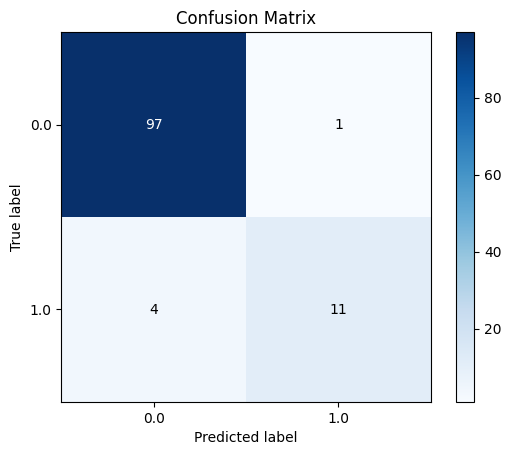

In [ ]:
skplt.metrics.plot_confusion_matrix(Y_test,yPred)

In [ ]:
print(classification_report(Y_test,yPred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        98
         1.0       0.92      0.73      0.81        15

    accuracy                           0.96       113
   macro avg       0.94      0.86      0.89       113
weighted avg       0.95      0.96      0.95       113



In [ ]:
accuracy_score(Y_test,yPred)

0.9557522123893806